# Pymaceuticals Inc.
---
### Tasks:

Prepare the data.

Generate summary statistics.

Create bar charts and pie charts.

Calculate quartiles, find outliers, and create a box plot.

Create a line plot and a scatter plot.

Calculate correlation and regression.

Submit your final analysis.al analysis.

### Analysis

- Refer to README.ME for written Analysis
 

### Prepare the Data:

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedDF = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combinedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [105]:
# Checking the number of mice.
miceCount= combinedDF['Mouse ID'].value_counts()
print(len(miceCount))

249


In [106]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceDuplicates = combinedDF[combinedDF[['Mouse ID', 'Timepoint']] .duplicated(keep=False)]
miceDuplicatesID = miceDuplicates['Mouse ID'].unique()
print(miceDuplicatesID)

['g989']


In [107]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_data = combinedDF.loc[combinedDF["Mouse ID"] == miceDuplicatesID[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanCombinedDF= combinedDF.loc[combinedDF['Mouse ID'] != 'g989']
cleanCombinedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [109]:
# Checking the number of mice in the clean DataFrame.
cleanMiceCount=cleanCombinedDF['Mouse ID'].value_counts()
print(len(cleanMiceCount))

248


## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupedData = cleanCombinedDF.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean= groupedData.mean()
median = groupedData.median()
variance = groupedData.var()
standardDeviation = groupedData.std()
sem= groupedData.sem()

# Assemble the resulting series into a single summary DataFrame.
summaryDF = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': standardDeviation,
    'Tumor Volume Std. Error': sem})
summaryDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [111]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
otherSummaryDF = groupedData.agg(['mean', 'median', 'var', 'std', 'sem'])
otherSummaryDF

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

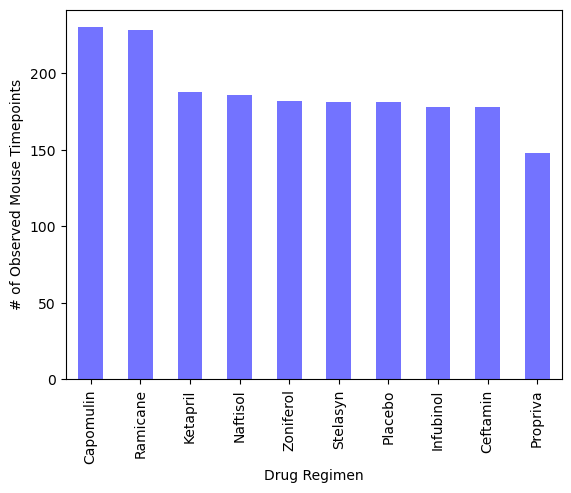

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
BarData= cleanCombinedDF['Drug Regimen'].value_counts()
BarData.plot(kind='bar',
             xlabel='Drug Regimen',
             ylabel = '# of Observed Mouse Timepoints',
             color= 'b', alpha = 0.55)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

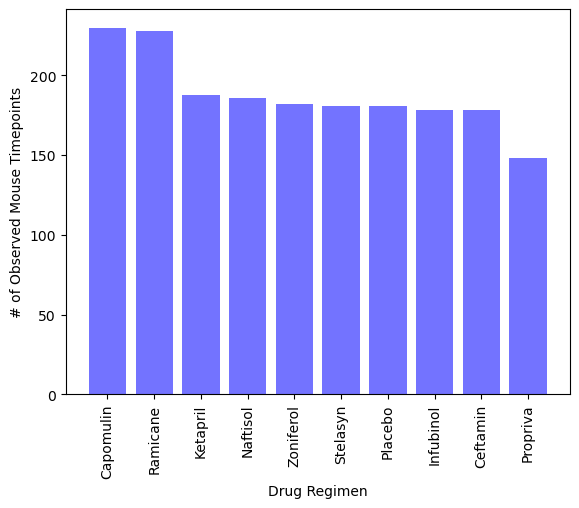

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Make xaxix and yaxis variables (into a list so that it can be utilized)
xAxis = BarData.index.tolist()
yAxis = BarData.values.tolist()

# Plot
plt.figure(figsize = (6.5,5))
plt.bar(xAxis, yAxis, color='b', alpha = 0.55, align = 'center')
plt.xticks(rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show

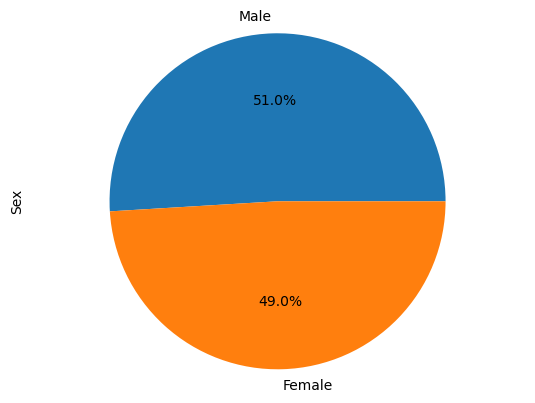

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Set ascending to false to switch blue(Male) and orange(Female)
PieData = cleanCombinedDF.groupby('Sex').count().sort_values('Mouse ID', ascending=False)
labels = PieData.index

PieData['Mouse ID'].plot(kind = 'pie',
                         labels = labels,
                         autopct='%1.1f%%',
                        ylabel= 'Sex')
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

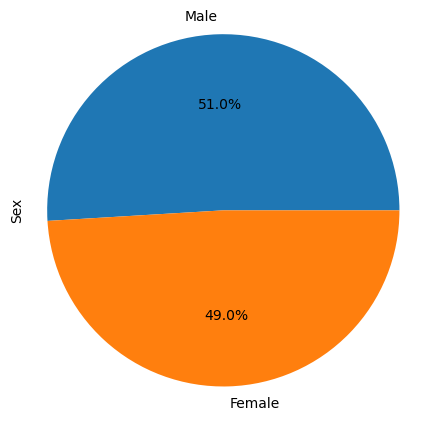

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (5,5))
plt.pie(PieData['Mouse ID'],
        labels=labels,
        autopct='%1.1f%%')
plt.ylabel('Sex')
plt.axis('equal')
plt.show

## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Start by getting the last (greatest) timepoint for each mouse
maxTimepoints = cleanCombinedDF.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalTumorDF = pd.merge(maxTimepoints, cleanCombinedDF, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DF to only the drugs we're interested in and create a subsetDF
subsetDF = finalTumorDF[finalTumorDF['Drug Regimen'].isin(treatments)]
subsetDF = subsetDF.sort_values('Drug Regimen')
subsetDF.head()

# Create empty list to fill with tumor volume data (for plotting)
tumorVol = []

# Creat a for loop to calculate the IQR and determine if there are any outliers
for treatment in treatments:
    # Locate the rows that contain mice on each drug regimen and get the tumor volumes
    tumorVolume = subsetDF.loc[subsetDF['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumorVol.append(tumorVolume)
    
    # Calculate quartiles and IQR
    quartiles = tumorVolume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Find upper and lower bounds and determine outliers
    lowerBound = lowerq - 1.5 * iqr
    upperBound = upperq + 1.5 * iqr
    outliers = tumorVolume.loc[(tumorVolume < lowerBound) | (tumorVolume > upperBound)]
    
    # Print outliers if they exist
    if not outliers.empty:
        print(f"For {treatment}, the outliers are: {outliers}")
    else:
        print(f"There are no outliers for {treatment}")

There are no outliers for Capomulin
There are no outliers for Ramicane
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
There are no outliers for Ceftamin


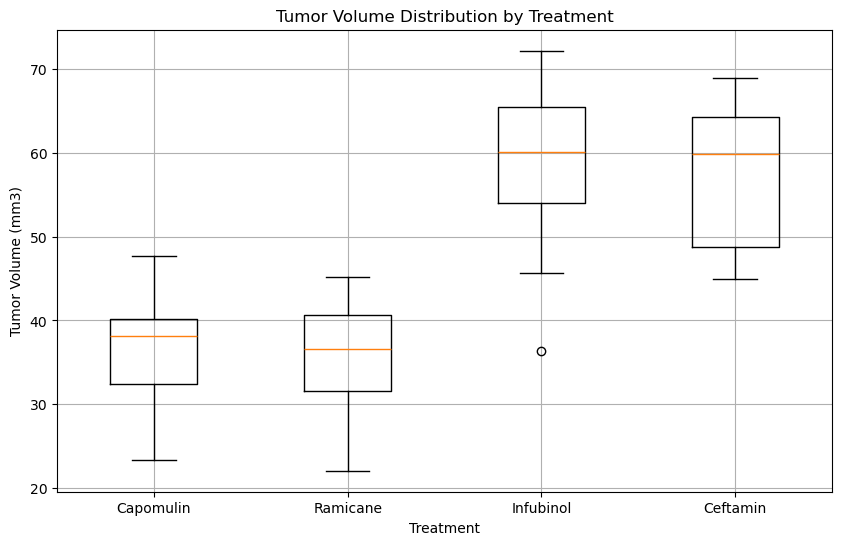

In [154]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumorVol, labels=treatments)

# Set the title and labels
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()

## Line and Scatter Plots

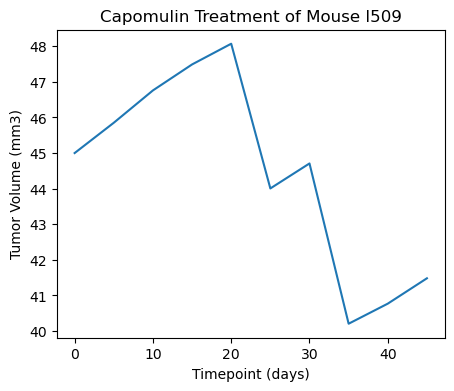

In [119]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# # Create variables for a single mouse in Capomulin and loc in DF
mouseID= 'l509'
capMouse= cleanCombinedDF.loc[cleanCombinedDF['Mouse ID'] == mouseID]
time= capMouse['Timepoint']
vol= capMouse['Tumor Volume (mm3)']

# # Plot
plt.figure(figsize = (5,4))
plt.plot (time, vol)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


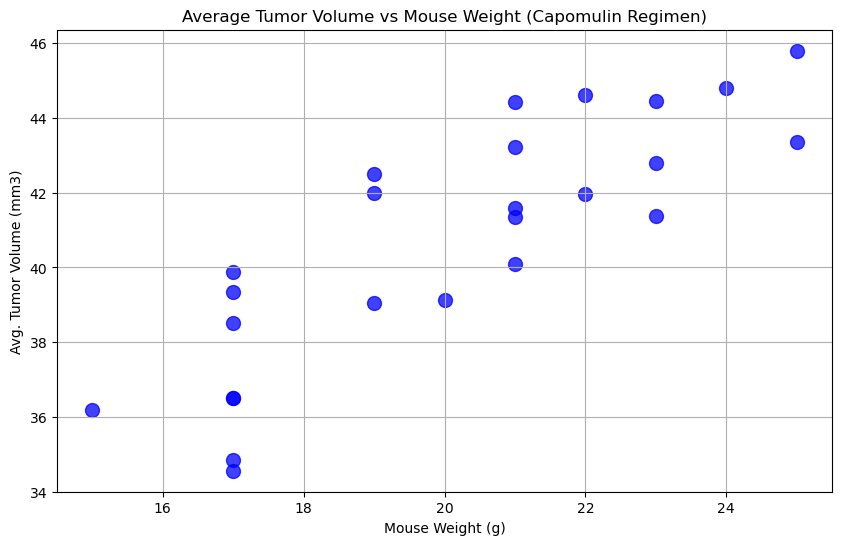

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter
capMice = cleanCombinedDF[cleanCombinedDF['Drug Regimen'] == 'Capomulin']

# Calculate avg
avgTumor= capMice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avgTumor = avgTumor.reset_index()

# Merg to get all the data
avgTumor = pd.merge(avgTumor, capMice[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(avgTumor['Weight (g)'], avgTumor['Tumor Volume (mm3)'],
            marker='o', color='blue', edgecolors='blue', s=100, alpha=0.75)
plt.title('Average Tumor Volume vs Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

In [126]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation Coefficient
corrCoef = st.pearsonr(avgTumor['Weight (g)'],avgTumor['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corrCoef[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.71


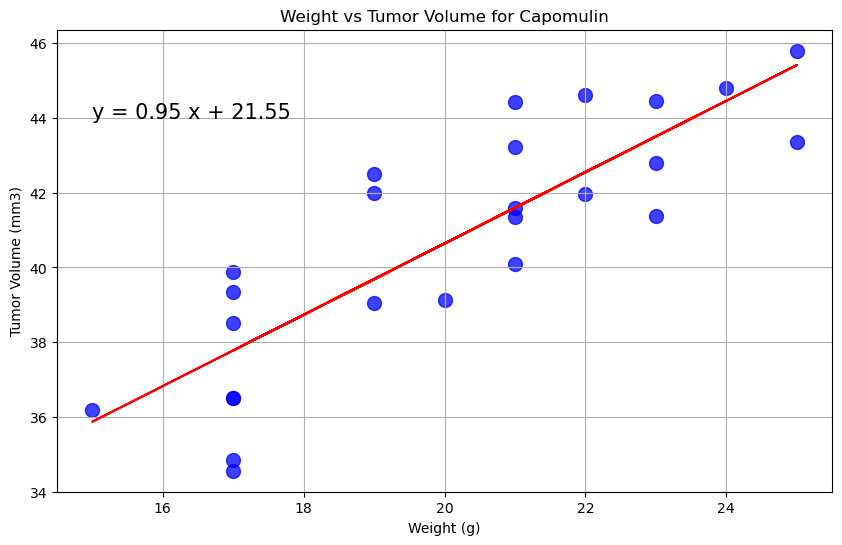

In [141]:
# Make X and Y values to find the line equation 
xValue= avgTumor["Weight (g)"]
yValue= avgTumor["Tumor Volume (mm3)"]

# Find line equation using linregress and y=mx+b
(slope, intercept,rvalue, pvalue, stderr)= linregress(xValue, yValue)
regressValue=avgTumor["Weight (g)"]* slope + intercept
lineEQ= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Plot and Annotate
plt.figure(figsize=(10, 6))
plt.scatter(xValue,yValue,color='b', marker='o', edgecolors='b', s=100, alpha=0.75)
plt.plot(avgTumor["Weight (g)"], regressValue, color='r')
plt.annotate(lineEQ,(15,44), fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.grid(True)
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()